# Fan Bu
# Gold 3

# Final Project Template
This notebook is a template that you can use for your final project. Please replace the title with a title appropriate for your sutdy and follow the guidance for each step. 

## Dataset Description (10 points)
Tell us about your dataset, including: 
    - Where you got it
    - Why the source is reliable
    - How it was gathered (study info, participants, etc.)
    - What each column contains and any applicable measurment units

- I got my data set from Kaggle.com (https://www.kaggle.com/kumarajarshi/life-expectancy-who)
- the source is reliable since it is an online community of data scientists and machine learners, owned by Google LLC. It is widely used for people to learn about data science 
- The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.
- the dataset contains 2239 rows and 22 columns.

- Country:Country
- Year:Year
- Status:Developed or Developing status
- Life expectancy: Life Expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- Percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI Average: Body Mass Index of entire population
- Under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)
           


## Read in and Clean Dataset (10 points)
Read in your dataset and do all of the necessary transformations and munging including: 
    - Parsing column headers
    - Finding and handling null values
    - Encoding categorical variables
    - Dropping unnecessary columns
    - Binning any large range categorical variables

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#get the dataset
life_path = "./life.csv"
df = pd.read_csv(life_path, sep=",", header=0)
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()

In [9]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [10]:
df.rename(columns ={'Country':'country', 'Year':'year','Status':'status','Life expectancy':'life_expectancy','Adult Mortality':'adult_mortality','Hepatitis B':'H_B', 'percentage expenditure':'pctexpenditure' ,'infant deaths':'infant_deaths','Alcohol':'alcohol','Measles':'measles','BMI':'bmi','under-five deaths':'under_5_deaths','Polio':'polio','Total expenditure':'total_expenditure','Diphtheria':'diphtheria','HIV/AIDS':'hiv_aids','GDP':'gdp','Population':'popl','thinness  1-19 years':'1_19thinness','thinness 5-9 years':'5_9thinness','Income composition of resources':'income_comp','Schooling':'school'},inplace= True)

In [11]:
df.columns #column name after formatting 

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'pctexpenditure', 'H_B', 'measles', 'bmi',
       'under_5_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'gdp', 'popl', '1_19thinness', '5_9thinness', 'income_comp',
       'school'],
      dtype='object')

In [12]:
df.isnull().sum()

country                0
year                   0
status                 0
life_expectancy       10
adult_mortality       10
infant_deaths          0
alcohol              194
pctexpenditure         0
H_B                  553
measles                0
bmi                   34
under_5_deaths         0
polio                 19
total_expenditure    226
diphtheria            19
hiv_aids               0
gdp                  448
popl                 652
1_19thinness          34
5_9thinness           34
income_comp          167
school               163
dtype: int64

In [13]:
null = df[df.isnull().any(axis=1)]
null

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,pctexpenditure,H_B,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,popl,1_19thinness,5_9thinness,income_comp,school
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.000000,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9


In [14]:
#Forward fill the null values 
df = df.fillna(method="ffill")



In [15]:
df.isnull().sum()

country              0
year                 0
status               0
life_expectancy      0
adult_mortality      0
infant_deaths        0
alcohol              0
pctexpenditure       0
H_B                  0
measles              0
bmi                  0
under_5_deaths       0
polio                0
total_expenditure    0
diphtheria           0
hiv_aids             0
gdp                  0
popl                 0
1_19thinness         0
5_9thinness          0
income_comp          0
school               0
dtype: int64

In [16]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,pctexpenditure,H_B,measles,bmi,under_5_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,popl,1_19thinness,5_9thinness,income_comp,school
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.195643,164.816542,30.303948,4.607270,738.251295,75.683799,2419.592240,38.020150,42.035739,82.307692,5.905211,82.075221,1.742103,7475.593613,1.316870e+07,4.955956,5.002553,0.631418,11.935671
std,4.613841,9.536654,124.433748,117.926501,4.044785,1987.914858,28.851806,11467.272489,20.175077,160.445548,23.636677,2.484620,23.917022,5.077785,13728.461983,5.629984e+07,4.541403,4.670154,0.210920,3.340202
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.025000,74.000000,0.000000,0.880000,4.685343,66.000000,0.000000,19.000000,0.000000,77.000000,4.260000,78.000000,0.100000,456.766527,1.364255e+05,1.600000,1.600000,0.494000,10.100000
50%,2008.000000,72.000000,144.000000,3.000000,3.765000,64.912906,89.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1680.834893,1.289898e+06,3.400000,3.400000,0.684000,12.300000
75%,2012.000000,75.600000,228.000000,22.000000,7.665000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.440000,97.000000,0.800000,6454.061607,7.394106e+06,7.300000,7.300000,0.791000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [17]:
#encode status
df.status.unique()

array(['Developing', 'Developed'], dtype=object)

In [18]:
feature_sts = pd.DataFrame(df.status)
encoded_sts = pd.get_dummies(feature_sts['status'])
encoded_sts.head()

,Developed,Developing
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [19]:
#change all int64 to float 
df['year']=df.year.astype('float64')
df['infant_deaths']=df.infant_deaths.astype('float64')
df['measles']=df.measles.astype('float64')
df['under_5_deaths']=df.under_5_deaths.astype('float64')
df.dtypes

country               object
year                 float64
status                object
life_expectancy      float64
adult_mortality      float64
infant_deaths        float64
alcohol              float64
pctexpenditure       float64
H_B                  float64
measles              float64
bmi                  float64
under_5_deaths       float64
polio                float64
total_expenditure    float64
diphtheria           float64
hiv_aids             float64
gdp                  float64
popl                 float64
1_19thinness         float64
5_9thinness          float64
income_comp          float64
school               float64
dtype: object

In [20]:
#don't need to bin any column

In [21]:
#drop the two thinness columns to reduce the data size 
df.drop(['1_19thinness','5_9thinness'],axis=1, inplace = True)


In [22]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,pctexpenditure,H_B,measles,bmi,under_5_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,popl,income_comp,school
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5


## Exploratory Data Analysis (20 points)
Once you've cleaned your dataset, now you can examine your dataset using the steps we outlined in the EDA section of class, including: 
- Examing the distribution of features
- Feature normalization and scaling
- Examining and plotting correlation between variables
- Detecting and Handling outliers

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
import scipy.stats as stats

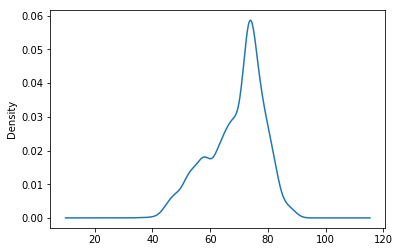

In [24]:
#plot life_expectancy
%matplotlib inline
df.life_expectancy.plot(kind='density')

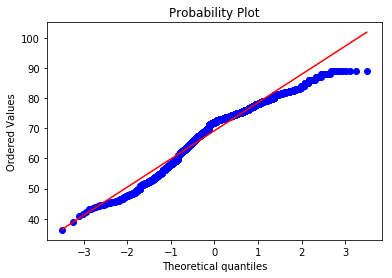

In [25]:
stats.probplot(df.life_expectancy, dist="norm", plot=plt)
plt.show()

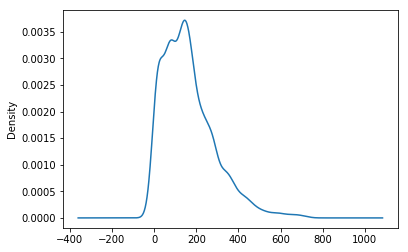

In [26]:
#plot adult_mortality
%matplotlib inline
df.adult_mortality.plot(kind='density')

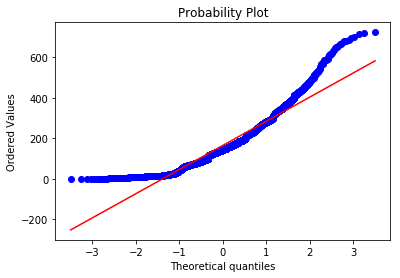

In [27]:
stats.probplot(df.adult_mortality, dist="norm", plot=plt)
plt.show()

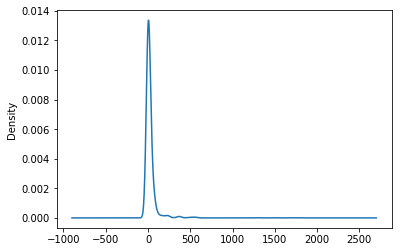

In [28]:
#plot infant_deaths 
%matplotlib inline
df.infant_deaths.plot(kind='density')

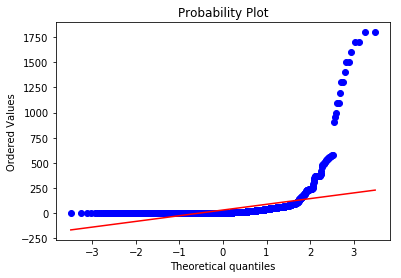

In [29]:
stats.probplot(df.infant_deaths, dist="norm", plot=plt)
plt.show()

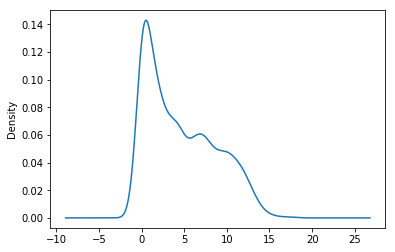

In [30]:
#plot alcohol    
%matplotlib inline
df.alcohol.plot(kind='density')

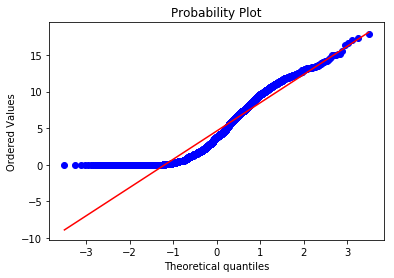

In [31]:
stats.probplot(df.alcohol, dist="norm", plot=plt)
plt.show()

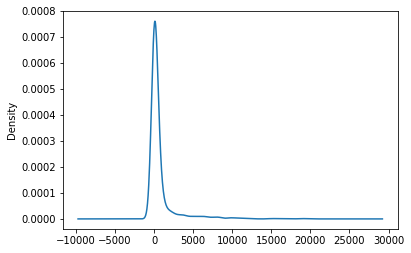

In [32]:
#plot %expenditure   
%matplotlib inline
df.pctexpenditure.plot(kind='density')

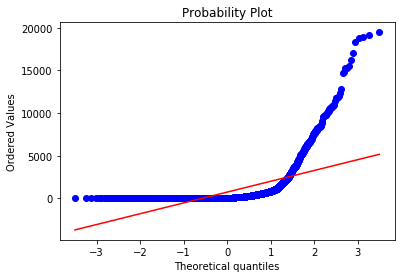

In [33]:
stats.probplot(df.pctexpenditure, dist="norm", plot=plt)
plt.show()

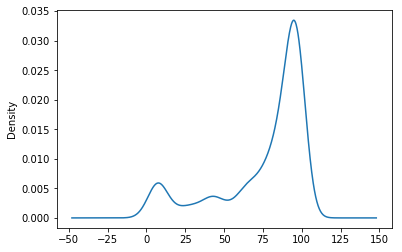

In [34]:
#plot H_B
%matplotlib inline
df.H_B.plot(kind='density')

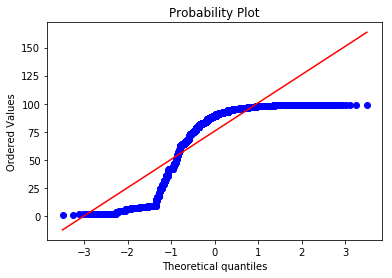

In [35]:
stats.probplot(df.H_B, dist="norm", plot=plt)
plt.show()

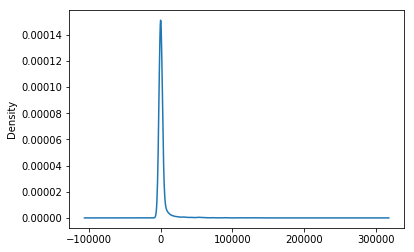

In [36]:
#plot measles  
%matplotlib inline
df.measles.plot(kind='density')

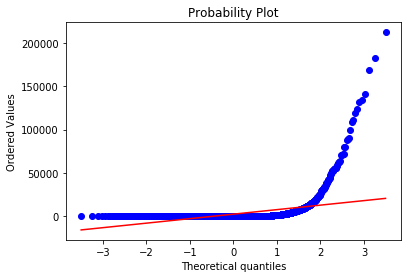

In [37]:
stats.probplot(df.measles, dist="norm", plot=plt)
plt.show()

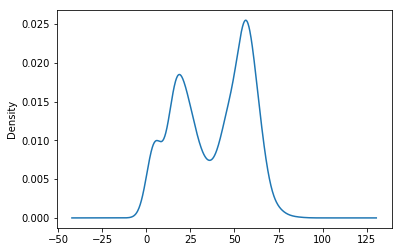

In [38]:
#plot bmi  
%matplotlib inline
df.bmi.plot(kind='density')

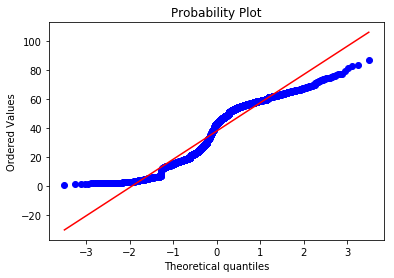

In [39]:
stats.probplot(df.bmi, dist="norm", plot=plt)
plt.show()

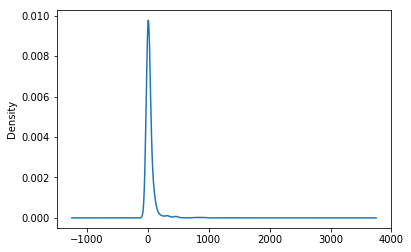

In [40]:
#plot under_5_deaths   
%matplotlib inline
df.under_5_deaths.plot(kind='density')

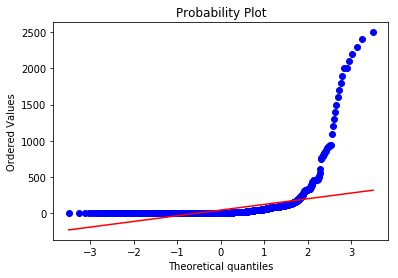

In [41]:
stats.probplot(df.under_5_deaths, dist="norm", plot=plt)
plt.show()

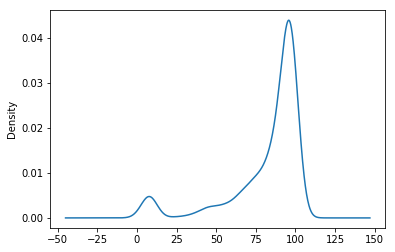

In [42]:
#plot polio
%matplotlib inline
df.polio.plot(kind='density')

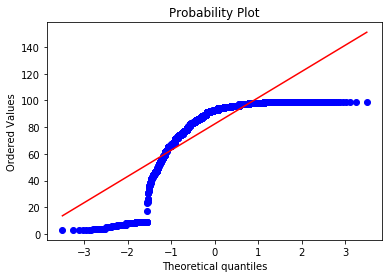

In [43]:
stats.probplot(df.polio, dist="norm", plot=plt)
plt.show()

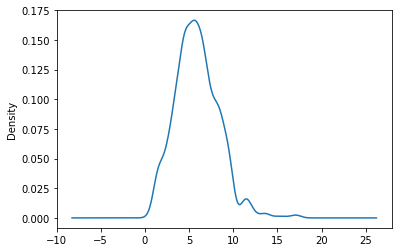

In [44]:
#plot under_5_deaths   
%matplotlib inline
df.total_expenditure.plot(kind='density')

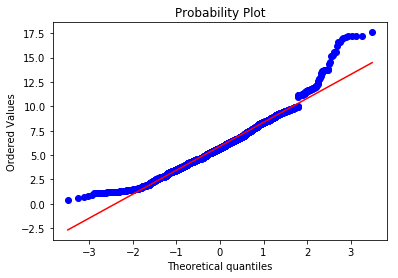

In [45]:
stats.probplot(df.total_expenditure, dist="norm", plot=plt)
plt.show()

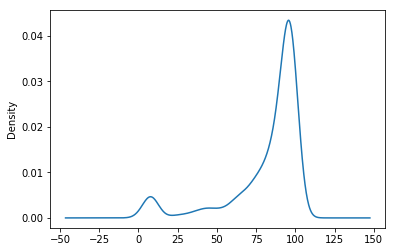

In [46]:
#plot diphtheria    
%matplotlib inline
df.diphtheria.plot(kind='density')

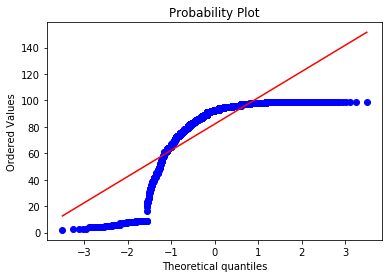

In [47]:
stats.probplot(df.diphtheria, dist="norm", plot=plt)
plt.show()

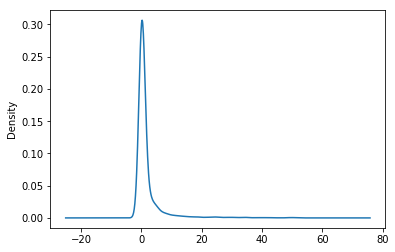

In [48]:
#plot hiv_aids   
%matplotlib inline
df.hiv_aids.plot(kind='density')

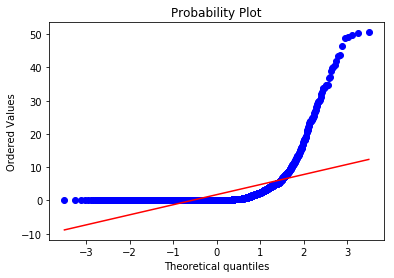

In [49]:
stats.probplot(df.hiv_aids, dist="norm", plot=plt)
plt.show()

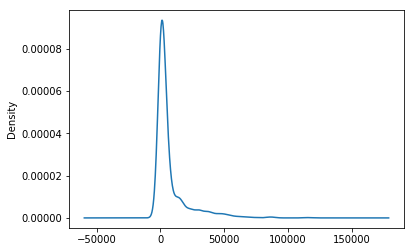

In [50]:
#plot gdp  
%matplotlib inline
df.gdp.plot(kind='density')

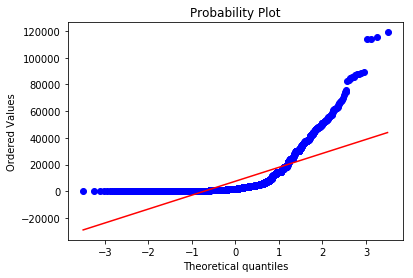

In [51]:
stats.probplot(df.gdp, dist="norm", plot=plt)
plt.show()

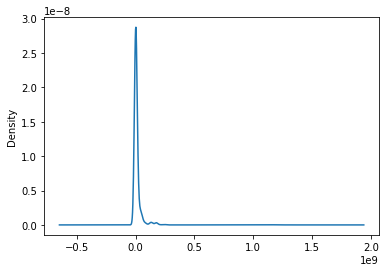

In [52]:
#plot population  
%matplotlib inline
df.popl.plot(kind='density')

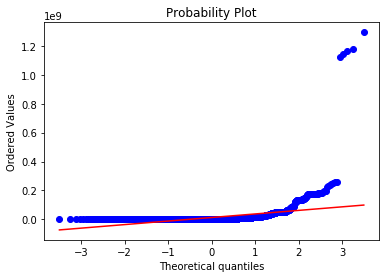

In [53]:
stats.probplot(df.popl, dist="norm", plot=plt)
plt.show()

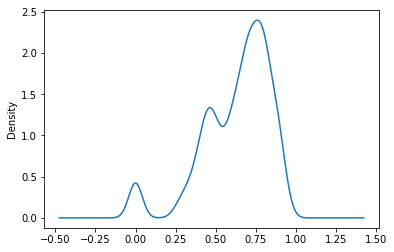

In [54]:
#plot income_comp  
%matplotlib inline
df.income_comp.plot(kind='density')

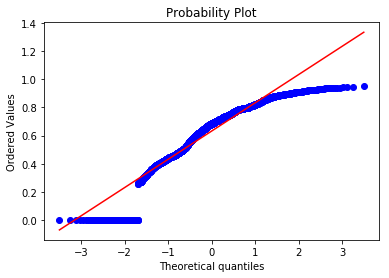

In [55]:
stats.probplot(df.income_comp, dist="norm", plot=plt)
plt.show()

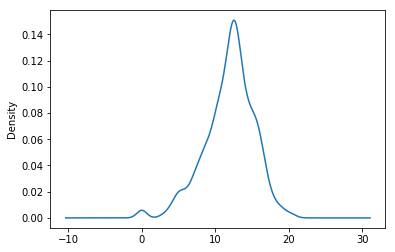

In [56]:
#plot schooling 
%matplotlib inline
df.school .plot(kind='density')

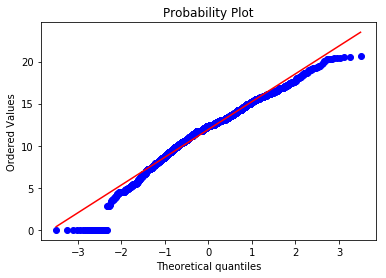

In [57]:
stats.probplot(df.school , dist="norm", plot=plt)
plt.show()

In [58]:
#using Z score to scale all columns except country,year,status
df_z= df.drop(['country','year','status'],axis=1)
df_z.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,pctexpenditure,H_B,measles,bmi,under_5_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,popl,income_comp,school
0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,0.479,10.1
1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,0.476,10.0
2,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,0.470,9.9
3,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,0.463,9.8
4,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,0.454,9.5


In [59]:
df_z.columns

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'pctexpenditure', 'H_B', 'measles', 'bmi', 'under_5_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'popl',
       'income_comp', 'school'],
      dtype='object')

In [60]:

from sklearn import preprocessing 
standard_scaler = preprocessing.StandardScaler()

In [61]:
df_z[['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'pctexpenditure', 'H_B', 'measles', 'bmi', 'under_5_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'popl',
       'income_comp', 'school']] = standard_scaler.fit_transform(df_z[['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'pctexpenditure', 'H_B', 'measles', 'bmi', 'under_5_deaths', 'polio',
       'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp', 'popl',
       'income_comp', 'school']])
df_z.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,pctexpenditure,H_B,measles,bmi,under_5_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,popl,income_comp,school
0,-0.440024,0.789176,0.268824,-1.136785,-0.335570,-0.370362,-0.110384,-0.937958,0.255359,-3.228909,0.907653,-0.714057,-0.323445,-0.502060,0.365388,-0.722755,-0.549662
1,-0.974894,0.853479,0.285786,-1.136785,-0.334441,-0.474359,-0.168124,-0.962745,0.274060,-1.028564,0.915704,-0.839512,-0.323445,-0.499988,-0.228123,-0.736981,-0.579606
2,-0.974894,0.829365,0.302749,-1.136785,-0.334594,-0.405028,-0.173531,-0.987532,0.292761,-0.859306,0.895577,-0.755876,-0.323445,-0.498600,0.329773,-0.765432,-0.609549
3,-1.016844,0.861516,0.328193,-1.136785,-0.332096,-0.301031,0.032045,-1.012320,0.317696,-0.647735,1.052569,-0.630421,-0.323445,-0.495816,-0.168266,-0.798626,-0.639492
4,-1.048307,0.885630,0.345155,-1.136785,-0.367862,-0.266365,0.051757,-1.032149,0.342631,-0.605420,0.790915,-0.588602,-0.323445,-0.539996,-0.181028,-0.841303,-0.729323


In [62]:
from scipy.stats import normaltest
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.life_expectancy)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9561527371406555, Pvalue= 7.123110880920739e-29
Sample does not look Gaussian (reject H0)


In [63]:

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.adult_mortality )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9168955683708191, Pvalue= 1.8321034627440185e-37
Sample does not look Gaussian (reject H0)


In [64]:

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.infant_deaths )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.2318798303604126, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [65]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.alcohol)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9106111526489258, Pvalue= 1.618532516679229e-38
Sample does not look Gaussian (reject H0)


In [66]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.pctexpenditure   )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.406660795211792, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [67]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.H_B)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.7581052184104919, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [68]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.measles  )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.20676159858703613, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [69]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.bmi)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9294866323471069, Pvalue= 3.8204143243434586e-35
Sample does not look Gaussian (reject H0)


In [70]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.under_5_deaths)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.24029141664505005, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [71]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.polio)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.6900482177734375, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [72]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.total_expenditure)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9733099341392517, Pvalue= 5.174076515105285e-23
Sample does not look Gaussian (reject H0)


In [73]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.diphtheria)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.68901526927948, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [74]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.hiv_aids)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.3567809462547302, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [75]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.gdp)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.5775603652000427, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [76]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.popl)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.19182157516479492, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


In [77]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.income_comp)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9026798605918884, Pvalue= 9.139632921927181e-40
Sample does not look Gaussian (reject H0)


In [78]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.school)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9757860898971558, Pvalue= 6.035283727726371e-22
Sample does not look Gaussian (reject H0)


In [79]:
corr_mat = df_z.corr()

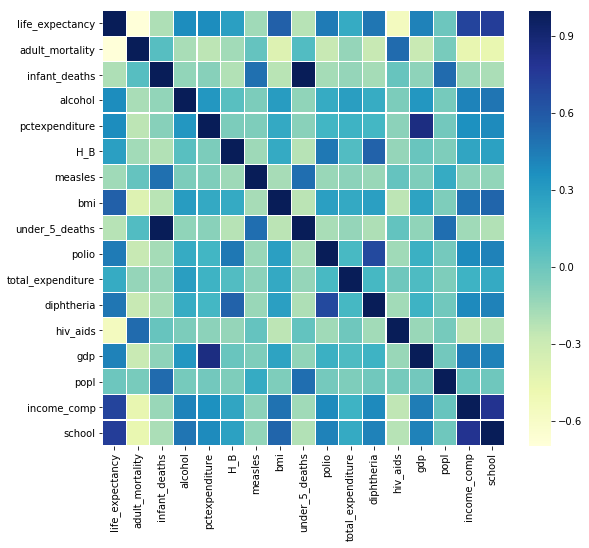

In [80]:
# plot results 
%matplotlib inline
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [81]:
df_z[['under_5_deaths','infant_deaths']].corr()

,under_5_deaths,infant_deaths
under_5_deaths,1.000000,0.996629
infant_deaths,0.996629,1.000000


In [82]:
df_z[['gdp','pctexpenditure']].corr()

,gdp,pctexpenditure
gdp,1.000000,0.850068
pctexpenditure,0.850068,1.000000


In [83]:
df_z[['bmi','life_expectancy']].corr()

,bmi,life_expectancy
bmi,1.000000,0.567361
life_expectancy,0.567361,1.000000


In [84]:
df_z[['income_comp','life_expectancy']].corr()

,income_comp,life_expectancy
income_comp,1.000000,0.705641
life_expectancy,0.705641,1.000000


In [86]:
df_z[['school','life_expectancy']].corr()

,school,life_expectancy
school,1.000000,0.736323
life_expectancy,0.736323,1.000000


In [85]:
df_x = df_z.drop(['under_5_deaths','infant_deaths','gdp','pctexpenditure'], axis=1)
#drop those columns since they are closely related

In [86]:
df_x.columns

Index(['life_expectancy', 'adult_mortality', 'alcohol', 'H_B', 'measles',
       'bmi', 'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'popl',
       'income_comp', 'school'],
      dtype='object')

In [87]:
len(df_x[abs(df_x.life_expectancy) > 2.5])

25

In [88]:
len(df_x[abs(df_x.adult_mortality) > 2.5])

70

In [89]:
len(df_x[abs(df_x.alcohol) > 2.5])

12

In [90]:
len(df_x[abs(df_x.H_B) > 2.5])

34

In [91]:
len(df_x[abs(df_x.measles) > 2.5])

58

In [92]:
len(df_x[abs(df_x.bmi) > 2.5])

0

In [93]:
len(df_x[abs(df_x.polio) > 2.5])

180

In [94]:
len(df_x[abs(df_x.total_expenditure) > 2.5])

39

In [95]:
len(df_x[abs(df_x.diphtheria) > 2.5])

179

In [96]:
len(df_x[abs(df_x.hiv_aids) > 2.5])

83

In [97]:
len(df_x[abs(df_x.popl) > 2.5])

45

In [98]:
len(df_x[abs(df_x.income_comp) > 2.5])

133

In [99]:
len(df_x[abs(df_x.school) > 2.5])

51

In [100]:
#drop outliers
df_x.drop(df_x[abs(df_x.life_expectancy)> 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.alcohol) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.adult_mortality) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.H_B) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.measles) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.bmi) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.polio) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.total_expenditure) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.diphtheria) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.hiv_aids) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.popl) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.income_comp) > 2.5].index,inplace = True)
df_x.drop(df_x[abs(df_x.school) > 2.5].index,inplace = True)

In [101]:
df_x.describe() #to check if all min/max is between -2.5 and 2.5

,life_expectancy,adult_mortality,alcohol,H_B,measles,bmi,polio,total_expenditure,diphtheria,hiv_aids,popl,income_comp,school
count,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000,2282.000000
mean,0.175020,-0.141670,0.038618,0.175950,-0.126639,0.102945,0.268235,-0.011401,0.266401,-0.174742,-0.077569,0.220334,0.137685
std,0.881837,0.816951,1.017716,0.851824,0.272211,0.989844,0.570038,0.915576,0.580495,0.389009,0.357407,0.743953,0.901285
min,-2.474627,-1.316720,-1.136785,-2.484974,-0.211036,-1.835257,-2.467251,-2.115457,-2.470428,-0.323445,-0.233942,-1.723304,-2.466040
25%,-0.345635,-0.746038,-0.925984,0.010961,-0.211036,-0.809064,0.113923,-0.637112,0.122309,-0.323445,-0.231674,-0.258045,-0.370002
50%,0.398987,-0.231621,-0.172417,0.565614,-0.210076,0.435257,0.494752,-0.044365,0.498674,-0.323445,-0.212072,0.367891,0.198923
75%,0.745080,0.371212,0.838316,0.738943,-0.188184,0.939678,0.664010,0.616815,0.624130,-0.264354,-0.115360,0.780439,0.737904
max,2.077010,2.477109,2.488252,0.808274,2.449945,2.443026,0.706324,2.497704,0.707766,2.473526,2.379994,1.501214,2.444678


In [102]:
df_y = pd.DataFrame(df_x,
                 columns=["life_expectancy"])
df_y.head()

,life_expectancy
1,-0.974894
2,-0.974894
3,-1.016844
4,-1.048307
5,-1.090258


Text(0.5,1,'adult mortality and life expectancy')

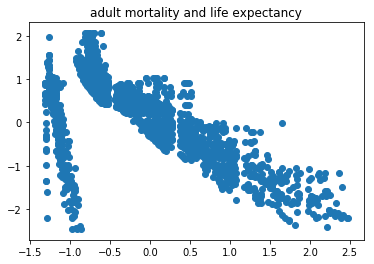

In [103]:
# plot each column vs target 
plt.scatter(df_x.adult_mortality, df_y.life_expectancy)
plt.title("adult mortality and life expectancy")

Text(0.5,1,'alcohol and life expectancy')

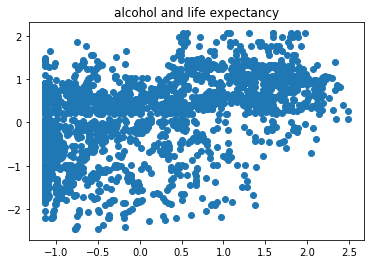

In [104]:
plt.scatter(df_x.alcohol, df_y.life_expectancy)
plt.title("alcohol and life expectancy")

Text(0.5,1,'Hepatitis B and life expectancy')

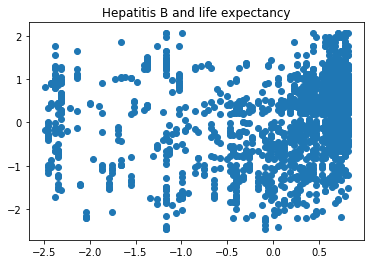

In [105]:
plt.scatter(df_x.H_B, df_y.life_expectancy)
plt.title("Hepatitis B and life expectancy")

Text(0.5,1,'measles and life expectancy')

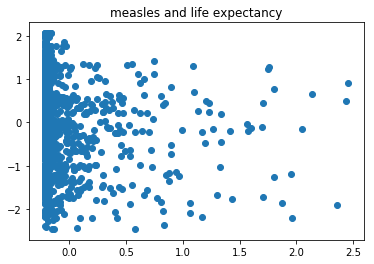

In [106]:
plt.scatter(df_x.measles, df_y.life_expectancy)
plt.title("measles and life expectancy")

Text(0.5,1,'BMI and life expectancy')

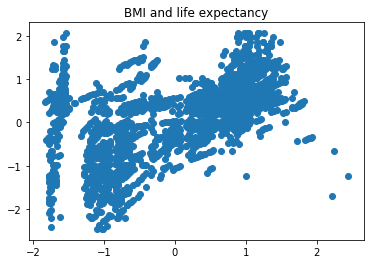

In [107]:
plt.scatter(df_x.bmi, df_y.life_expectancy)
plt.title("BMI and life expectancy")

Text(0.5,1,'polio and life expectancy')

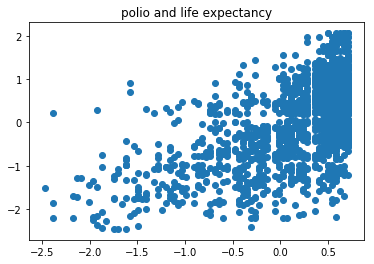

In [108]:
plt.scatter(df_x.polio, df_y.life_expectancy)
plt.title("polio and life expectancy")

Text(0.5,1,'total_expenditure and life expectancy')

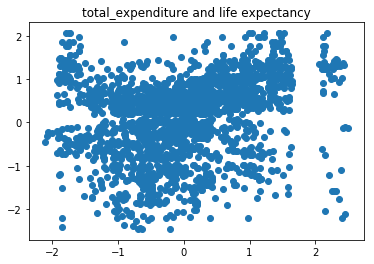

In [109]:
plt.scatter(df_x.total_expenditure, df_y.life_expectancy)
plt.title("total_expenditure and life expectancy")

Text(0.5,1,'diphtheria and life expectancy')

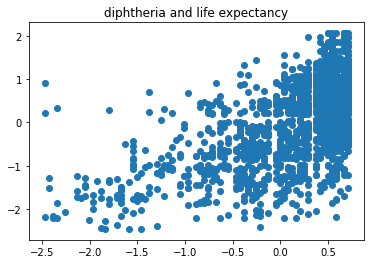

In [110]:
plt.scatter(df_x.diphtheria, df_y.life_expectancy)
plt.title("diphtheria and life expectancy")

Text(0.5,1,'hiv_aids and life expectancy')

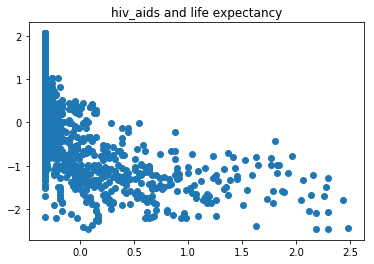

In [111]:
plt.scatter(df_x.hiv_aids, df_y.life_expectancy)
plt.title("hiv_aids and life expectancy")

Text(0.5,1,'population and life expectancy')

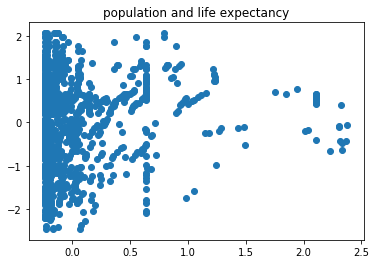

In [112]:
plt.scatter(df_x.popl, df_y.life_expectancy)
plt.title("population and life expectancy")

Text(0.5,1,'Income composition of resources and life expectancy')

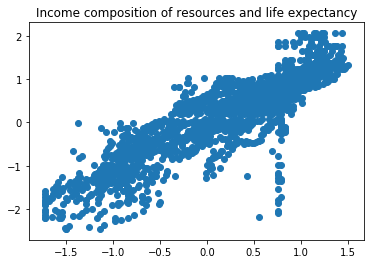

In [113]:
plt.scatter(df_x.income_comp, df_y.life_expectancy)
plt.title("Income composition of resources and life expectancy")

Text(0.5,1,'Schooling and life expectancy')

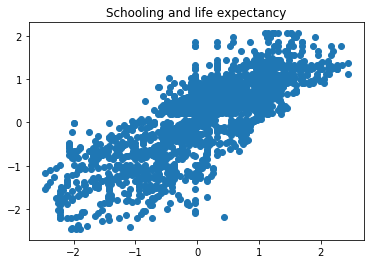

In [114]:
plt.scatter(df_x.school, df_y.life_expectancy)
plt.title("Schooling and life expectancy")

## Linear Regression (or supplement with another appropriate model) (20 points)
Once your data is in a roughly normal distribution, you can now setup your model for linear regression. The questions you ask in this section should have been guided by the results of your EDA. 
- Create your model
- Visualize results
- Examine error
- Check and plot residuals

In [115]:
#choose bmi,income_comp,schooling to do linear regrassion
df_xbmi=df_x[["bmi"]]
df_xincome=df_x[["income_comp"]]
df_xschool=df_x[["school"]]

In [116]:
#BMI
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_xbmi,df_y,  
                                                   test_size = 0.2,# pull out 20% here, 
                                                   random_state=42)

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=6)

In [118]:
fit = model.fit(x_train, y_train)

In [119]:
coef_bmi = pd.DataFrame([df_xbmi.columns[0], int(fit.coef_)]).T
coef_bmi.columns = ["feature", "coeff"]
coef_bmi 

,feature,coeff
0,bmi,0


In [120]:
#bmi didnt work, move on to Income composition of resources
#Income composition of resources
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_xincome,df_y,  
                                                   test_size = 0.2,# pull out 20% here, 
                                                   random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=6)

In [132]:
fit = model.fit(x_train, y_train)

In [133]:
coef_income = pd.DataFrame([df_xincome.columns[0], int(fit.coef_)]).T
coef_income.columns = ["feature", "coeff"]
coef_income

,feature,coeff
0,income_comp,1


In [134]:
preds = model.predict(x_test)

Text(0,0.5,'Predictions')

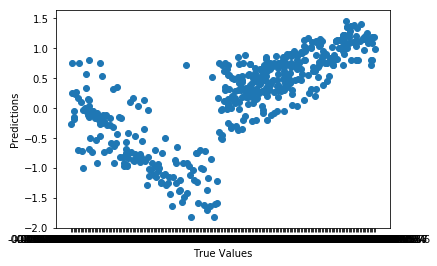

In [135]:
# plot  predictions against your actual values
plt.scatter(y_test,preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0,0.5,'Residuals')

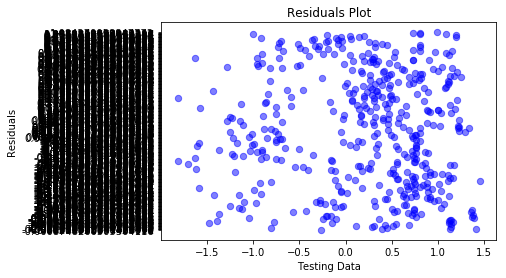

In [136]:
residuals = y_test- preds# calculate residuals
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [138]:
model.intercept_

array([-0.0505322])

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [140]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)

In [141]:
MAE

0.28758278243908247

In [142]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error

In [143]:
rmse

0.40978271084942292

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.78697343028472411

In [1098]:
#move on to schooling
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_xschool,df_y,  
                                                   test_size = .2,# pull out 20% here, 
                                                   random_state=42)


In [1099]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True,
                        n_jobs=6)

In [1100]:
fit = model.fit(x_train, y_train)

In [1101]:
coef_school = pd.DataFrame([df_xincome.columns[0], int(fit.coef_)]).T
coef_school.columns = ["feature", "coeff"]
coef_school

,feature,coeff
0,income_comp,0


In [ ]:
#schooling has no coeffcient either, stop linear regrassion anaylysis 

## Conclusion (40 points)
In this final section, you should draw conclusions based on your analysis. Each of your conclusion should be supported with visualizations and pvalues and any other appropriate measurments for your dataset. 

The data set contains quite a few numeric columns therefore was peferct to use for regression anaylysis. First of all, in order to analysis the data set and exam relations between the columns, I started with normality tests.


By looking at the density plots below, it is pretty clear that most columns are nor normally distributed.

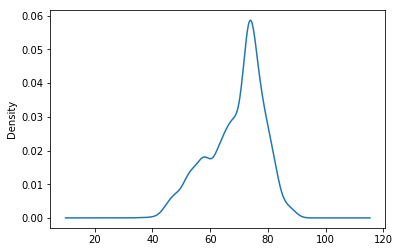

In [24]:
#plot life_expectancy
%matplotlib inline
df.life_expectancy.plot(kind='density')

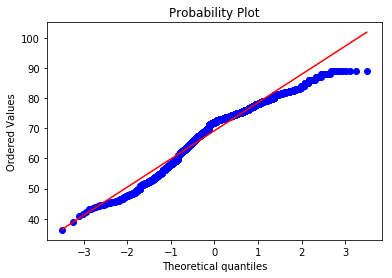

In [25]:
stats.probplot(df.life_expectancy, dist="norm", plot=plt)
plt.show()

In [62]:
from scipy.stats import normaltest
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.life_expectancy)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9561527371406555, Pvalue= 7.123110880920739e-29
Sample does not look Gaussian (reject H0)


Looking at the graphs, seems like the life expectancy column is roughly normaliy distributed with outliers towards the end. However, the Shapiro indicates that the distribution is not normal since the p values is very close to zero.

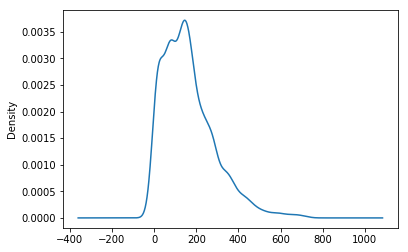

In [26]:
#plot adult_mortality
%matplotlib inline
df.adult_mortality.plot(kind='density')

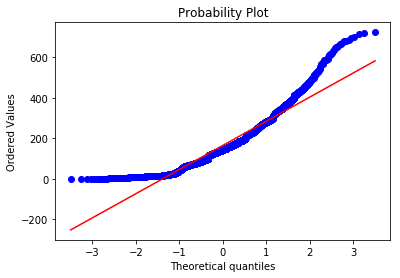

In [27]:
stats.probplot(df.adult_mortality, dist="norm", plot=plt)
plt.show()

In [63]:

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.adult_mortality )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9168955683708191, Pvalue= 1.8321034627440185e-37
Sample does not look Gaussian (reject H0)


Moving on to the adult normality column, neither of the graphs indicate that the column is normal. So without a suprise, the Shapiro indicates that the distribution is not normal and the p values is very close to zero

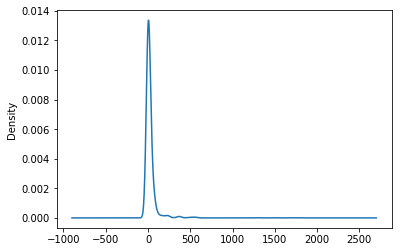

In [145]:
#plot infant_deaths 
%matplotlib inline
df.infant_deaths.plot(kind='density')

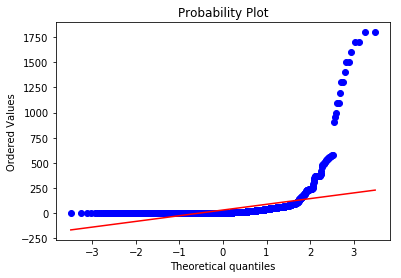

In [146]:
stats.probplot(df.infant_deaths, dist="norm", plot=plt)
plt.show()

In [65]:

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.infant_deaths )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.2318798303604126, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The infant deaths column is not normaliy distributed with 0 p-value, also contains quite a few outliers.

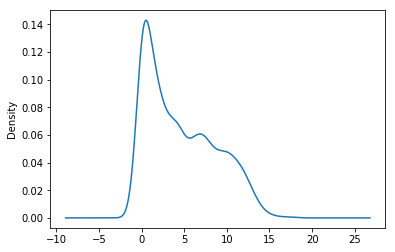

In [30]:
#plot alcohol    
%matplotlib inline
df.alcohol.plot(kind='density')

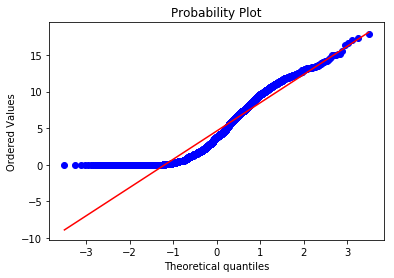

In [31]:
stats.probplot(df.alcohol, dist="norm", plot=plt)
plt.show()

In [66]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.alcohol)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9106111526489258, Pvalue= 1.618532516679229e-38
Sample does not look Gaussian (reject H0)


The alcohol consumption column is not normaliy distributed with close-to-zero p-value.

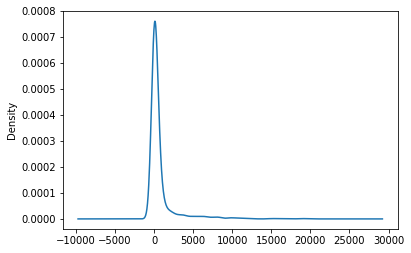

In [32]:
#plot %expenditure   
%matplotlib inline
df.pctexpenditure.plot(kind='density')

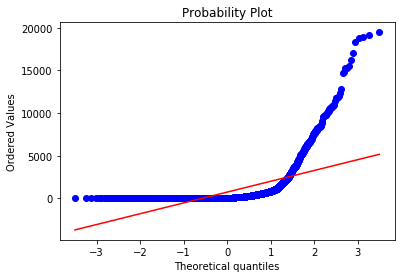

In [33]:
stats.probplot(df.pctexpenditure, dist="norm", plot=plt)
plt.show()

In [68]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.pctexpenditure   )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.406660795211792, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The percentage expenditure on healthcare column is not normaliy distributed with 0 as its p-value.

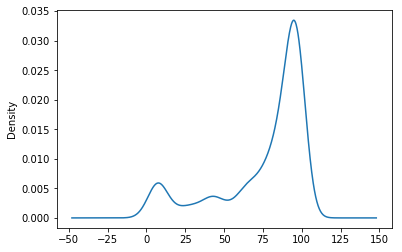

In [34]:
#plot H_B
%matplotlib inline
df.H_B.plot(kind='density')

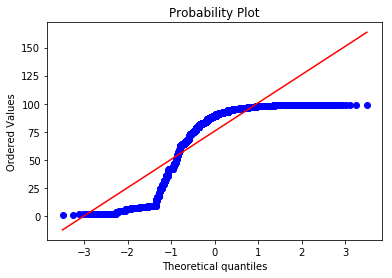

In [35]:
stats.probplot(df.H_B, dist="norm", plot=plt)
plt.show()

In [69]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.H_B)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.7581052184104919, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Hepatitis B immunization coveragee column is not normaliy distributed with 0 as its p-value.

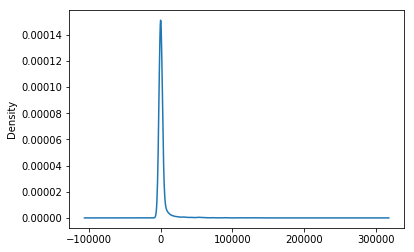

In [36]:
#plot measles  
%matplotlib inline
df.measles.plot(kind='density')

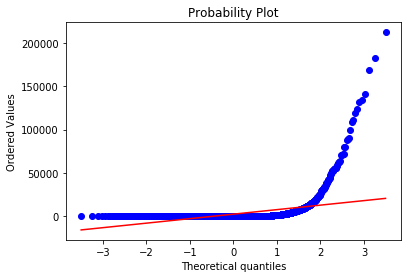

In [37]:
stats.probplot(df.measles, dist="norm", plot=plt)
plt.show()

In [70]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.measles  )
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.20676159858703613, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The number of reported Measles per 1000 population column is not normaliy distributed with 0 as its p-value.

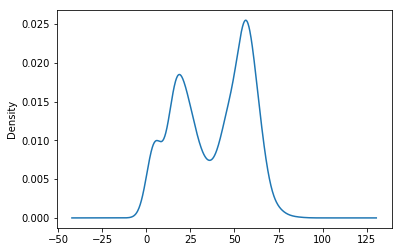

In [38]:
#plot bmi  
%matplotlib inline
df.bmi.plot(kind='density')

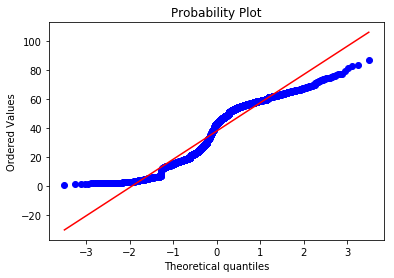

In [39]:
stats.probplot(df.bmi, dist="norm", plot=plt)
plt.show()

In [71]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.bmi)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9294866323471069, Pvalue= 3.8204143243434586e-35
Sample does not look Gaussian (reject H0)


The Average Body Mass Index of entire population column is not normaliy distributed with close to 0 p-value. The distribution is more close to bimodal. 

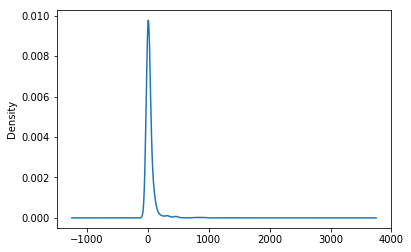

In [40]:
#plot under_5_deaths   
%matplotlib inline
df.under_5_deaths.plot(kind='density')

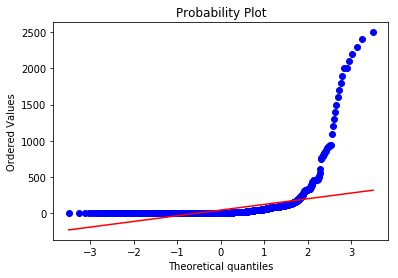

In [41]:
stats.probplot(df.under_5_deaths, dist="norm", plot=plt)
plt.show()

In [72]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.under_5_deaths)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.24029141664505005, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Number of under-five deaths per 1000 population column is not normaliy distributed with 0 p-value. Also contains quite a few strong outliers.

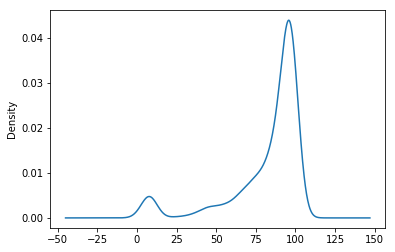

In [42]:
#plot polio
%matplotlib inline
df.polio.plot(kind='density')

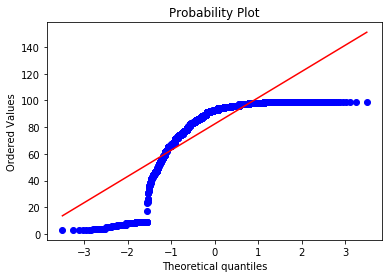

In [43]:
stats.probplot(df.polio, dist="norm", plot=plt)
plt.show()

In [73]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.polio)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.6900482177734375, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Polio (Pol3) immunization coverage among 1-year-olds (%) column is not normaliy distributed with 0 as its p-value.

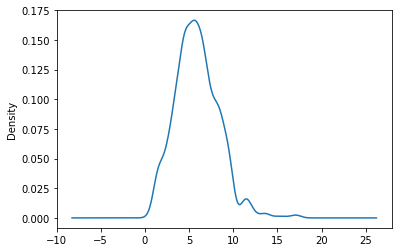

In [44]:
#plot under_5_deaths   
%matplotlib inline
df.total_expenditure.plot(kind='density')

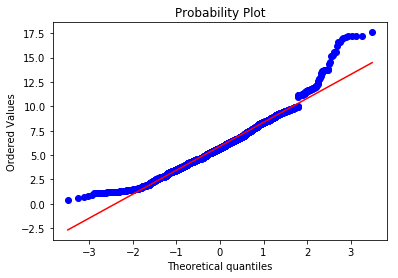

In [45]:
stats.probplot(df.total_expenditure, dist="norm", plot=plt)
plt.show()

In [74]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.total_expenditure)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9733099341392517, Pvalue= 5.174076515105285e-23
Sample does not look Gaussian (reject H0)


The General government expenditure on health as a percentage of total government expenditure (%) column is not normaliy distributed with an extremely small p-value.

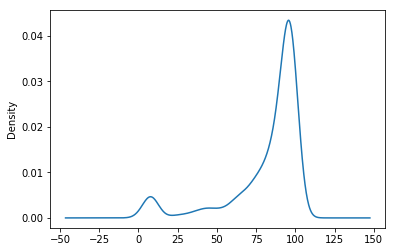

In [46]:
#plot diphtheria    
%matplotlib inline
df.diphtheria.plot(kind='density')

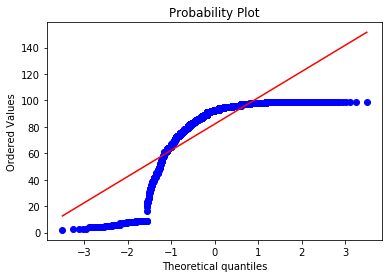

In [47]:
stats.probplot(df.diphtheria, dist="norm", plot=plt)
plt.show()

In [75]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.diphtheria)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.68901526927948, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%) column is not normaliy distributed with 0 as its p-value.

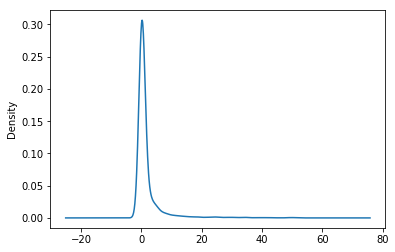

In [48]:
#plot hiv_aids   
%matplotlib inline
df.hiv_aids.plot(kind='density')

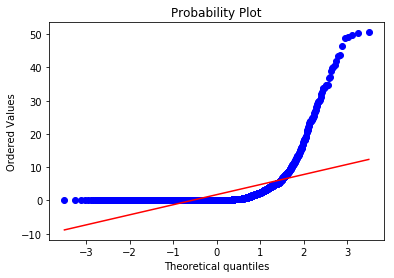

In [49]:
stats.probplot(df.hiv_aids, dist="norm", plot=plt)
plt.show()

In [76]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.hiv_aids)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.3567809462547302, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Deaths per 1 000 live births HIV/AIDS (0-4 years) column is not normaliy distributed with 0 as its p-value.

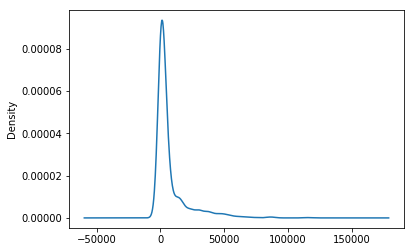

In [50]:
#plot gdp  
%matplotlib inline
df.gdp.plot(kind='density')

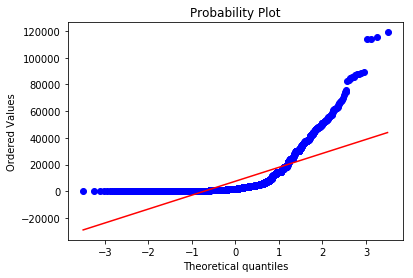

In [51]:
stats.probplot(df.gdp, dist="norm", plot=plt)
plt.show()

In [77]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.gdp)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.5775603652000427, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Gross Domestic Product per capita (in USD) is not normaliy distributed with 0 as its p-value.

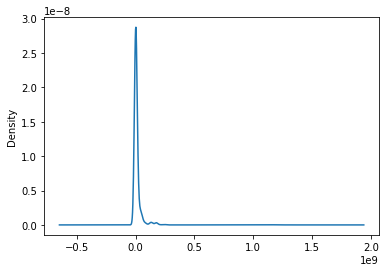

In [52]:
#plot population  
%matplotlib inline
df.popl.plot(kind='density')

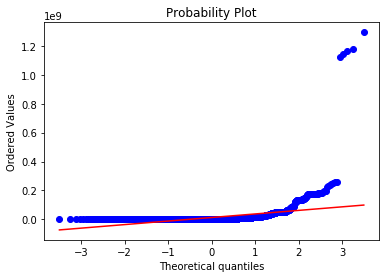

In [53]:
stats.probplot(df.popl, dist="norm", plot=plt)
plt.show()

In [78]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.popl)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.19182157516479492, Pvalue= 0.0
Sample does not look Gaussian (reject H0)


The Population is not normaliy distributed with 0 as its p-value.

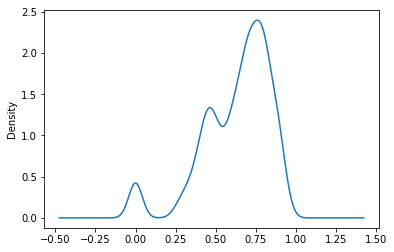

In [54]:
#plot income_comp  
%matplotlib inline
df.income_comp.plot(kind='density')

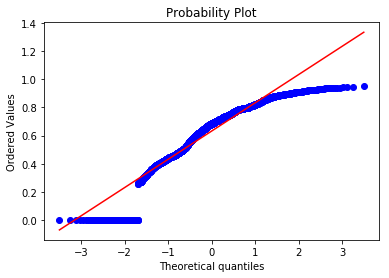

In [55]:
stats.probplot(df.income_comp, dist="norm", plot=plt)
plt.show()

In [79]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.income_comp)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9026798605918884, Pvalue= 9.139632921927181e-40
Sample does not look Gaussian (reject H0)


The Human Development Index in terms of income composition of resources column is not normaliy distributed with multiple modals and a close-to-zero p-value.

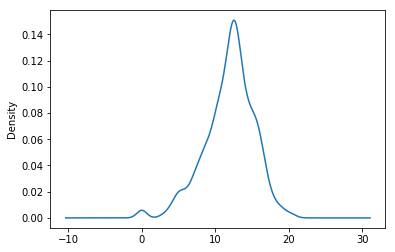

In [56]:
#plot schooling 
%matplotlib inline
df.school .plot(kind='density')

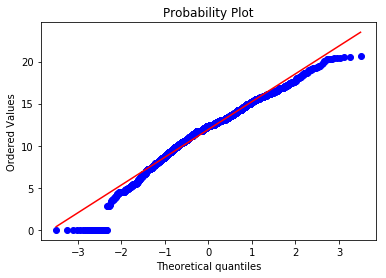

In [57]:
stats.probplot(df.school , dist="norm", plot=plt)
plt.show()

In [80]:
# run shapiro test and return the test stat and p value
W_stat, p = shapiro(df_z.school)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9757860898971558, Pvalue= 6.035283727726371e-22
Sample does not look Gaussian (reject H0)


The Number of years of Schooling(years) column is not normaliy distributed with multiple modals and a close-to-zero p-value.

Next, I used z-score to standarlize the dataset as well as detect outliers (z-score absolute value greater than 2.5). Overall, with 2239 rows of data, polio column has the most outliers (180), and bmi column has no outliers. 

The I examed the correlation bewteen each columns by using correlation heat map.

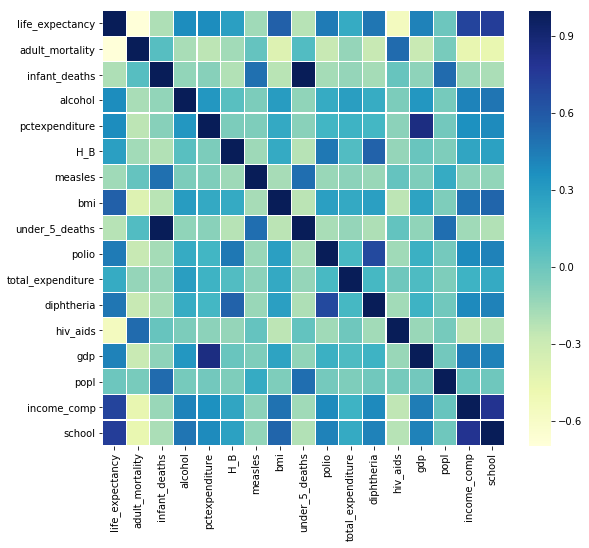

In [82]:
# plot results 
%matplotlib inline
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

As showing above, some of the columns are strongy correlated, such as : 
- under-5-deaths and infant deaths: reasonable strong correlation since under 5 deaths includes infant deaths;
- GPD and percent expenditures on healthcare: the higher the GDP is, the more can be spent on healthcare.

From this step forward, I set life expecta.cy as my y-value (depend value) and wished to exam any factors that could affect life expectancy.

Text(0.5,1,'adult mortality and life expectancy')

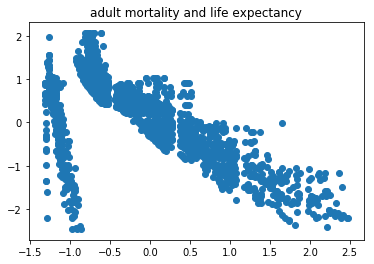

In [103]:
# plot each column vs target 
plt.scatter(df_x.adult_mortality, df_y.life_expectancy)
plt.title("adult mortality and life expectancy")

Text(0.5,1,'alcohol and life expectancy')

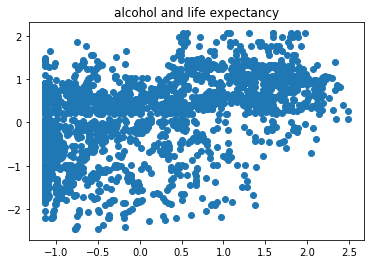

In [104]:
plt.scatter(df_x.alcohol, df_y.life_expectancy)
plt.title("alcohol and life expectancy")

Text(0.5,1,'Hepatitis B and life expectancy')

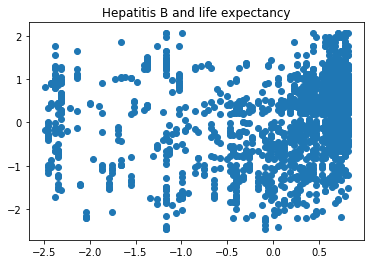

In [105]:
plt.scatter(df_x.H_B, df_y.life_expectancy)
plt.title("Hepatitis B and life expectancy")

Text(0.5,1,'measles and life expectancy')

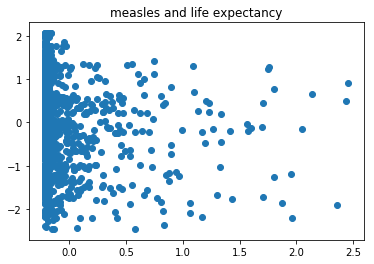

In [106]:
plt.scatter(df_x.measles, df_y.life_expectancy)
plt.title("measles and life expectancy")

Text(0.5,1,'BMI and life expectancy')

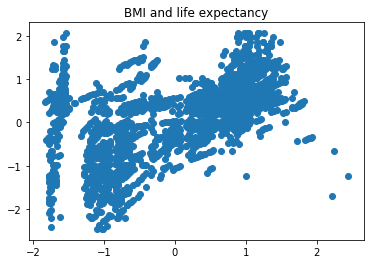

In [107]:
plt.scatter(df_x.bmi, df_y.life_expectancy)
plt.title("BMI and life expectancy")

Text(0.5,1,'polio and life expectancy')

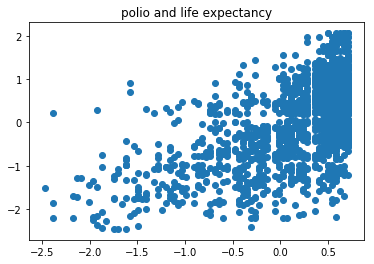

In [108]:
plt.scatter(df_x.polio, df_y.life_expectancy)
plt.title("polio and life expectancy")

Text(0.5,1,'total_expenditure and life expectancy')

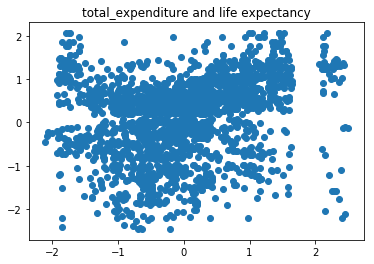

In [109]:
plt.scatter(df_x.total_expenditure, df_y.life_expectancy)
plt.title("total_expenditure and life expectancy")

Text(0.5,1,'diphtheria and life expectancy')

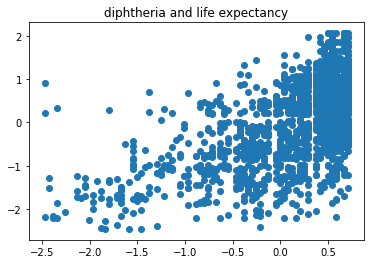

In [110]:
plt.scatter(df_x.diphtheria, df_y.life_expectancy)
plt.title("diphtheria and life expectancy")

Text(0.5,1,'hiv_aids and life expectancy')

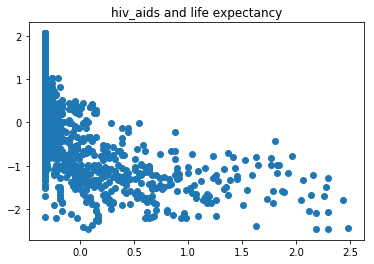

In [111]:
plt.scatter(df_x.hiv_aids, df_y.life_expectancy)
plt.title("hiv_aids and life expectancy")

Text(0.5,1,'population and life expectancy')

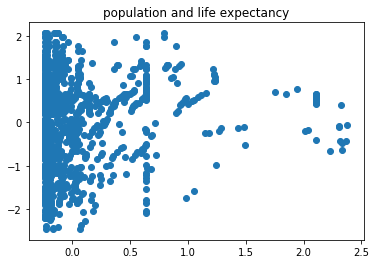

In [112]:
plt.scatter(df_x.popl, df_y.life_expectancy)
plt.title("population and life expectancy")

Text(0.5,1,'Income composition of resources and life expectancy')

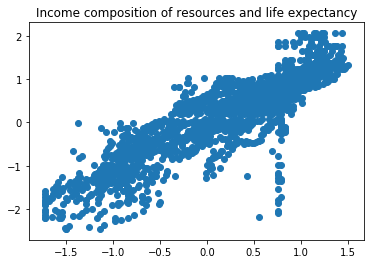

In [113]:
plt.scatter(df_x.income_comp, df_y.life_expectancy)
plt.title("Income composition of resources and life expectancy")

Text(0.5,1,'Schooling and life expectancy')

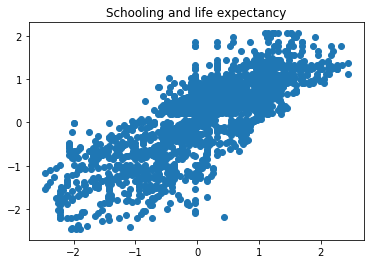

In [114]:
plt.scatter(df_x.school, df_y.life_expectancy)
plt.title("Schooling and life expectancy")

As the scatter plots showing above, columns of bmi, Income composition of resources and schooling seems to have a linear relation with my target column (life expectancy). So I took a step further by using liner regression analysis. 

In [133]:
coef_income = pd.DataFrame([df_xincome.columns[0], int(fit.coef_)]).T
coef_income.columns = ["feature", "coeff"]
coef_income

,feature,coeff
0,income_comp,1


In [84]:
df_z[['income_comp','life_expectancy']].corr()

,income_comp,life_expectancy
income_comp,1.000000,0.705641
life_expectancy,0.705641,1.000000


In [119]:
coef_bmi = pd.DataFrame([df_xbmi.columns[0], int(fit.coef_)]).T
coef_bmi.columns = ["feature", "coeff"]
coef_bmi 

,feature,coeff
0,bmi,0


In [83]:
df_z[['bmi','life_expectancy']].corr()

,bmi,life_expectancy
bmi,1.000000,0.567361
life_expectancy,0.567361,1.000000


In [1101]:
coef_school = pd.DataFrame([df_xincome.columns[0], int(fit.coef_)]).T
coef_school.columns = ["feature", "coeff"]
coef_school

,feature,coeff
0,income_comp,0


In [86]:
df_z[['school','life_expectancy']].corr()

,school,life_expectancy
school,1.000000,0.736323
life_expectancy,0.736323,1.000000


Only Income composition of resources indecates there is a linear relationship. And income composition and life expectancy have a relatively high correalation of 0.7. Next, I evaluted the relation by examing residuls. 

Text(0,0.5,'Predictions')

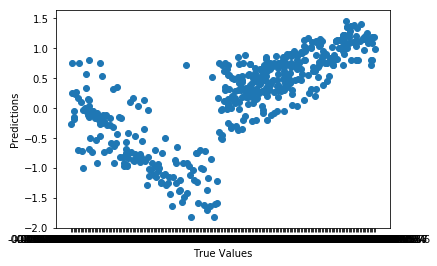

In [135]:
# plot  predictions against your actual values
plt.scatter(y_test,preds)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0,0.5,'Residuals')

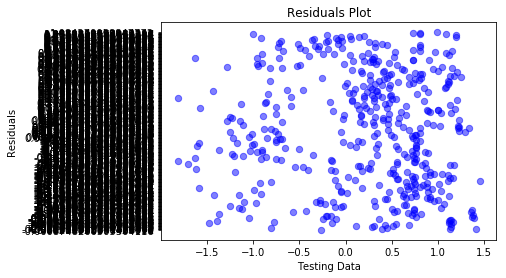

In [136]:
residuals = y_test- preds# calculate residuals
plt.scatter(model.predict(x_test), residuals,
            c='b', s=40, alpha=0.5) # plot x_test vs residuals
plt.title("Residuals Plot")
plt.xlabel("Testing Data")
plt.ylabel("Residuals")

In [138]:
model.intercept_

array([-0.0505322])

In [139]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import seaborn as sns

In [140]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, preds)

In [141]:
MAE

0.28758278243908247

In [142]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, preds) # calculate mean squared error
rmse = np.sqrt(mse) # calcualate root mean squared error

In [143]:
rmse

0.40978271084942292

In [144]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.78697343028472411

As showing above, the linear model between life expectancy and income composition of resoureces has a slope of 1 and interception of -.0505322. While the mean abosulte error and mean squared error being quite small, the R-sqaure value indicates the line might still be a good fit for describing the linear relation between the two columns. 

-End (thank you going through all the analysis)